Inspired/based on https://github.com/rayidghani/magicloops and https://github.com/dssg/MLforPublicPolicy/blob/master/labs/2019/lab6_feature_generation_sol.ipynb

In [213]:
import pipeline_evictions as pipeline
import ml_loop_evictions as loop

import importlib
import datetime
import pandas as pd
import numpy as np

# Read data

In [214]:
importlib.reload(pipeline)

datafile = "data/tracts.csv"

#Read data, parsing year column to date type
data = pd.read_csv(datafile, parse_dates=['year'])

# Create outcome label

In [215]:
def get_eviction_rate(df, year,geoid):
  
  data_to_return = df.loc[(df['year'] == year) & (df['GEOID'] == geoid)]
  
  return data_to_return['eviction-rate'].iloc[0]

In [216]:
importlib.reload(pipeline)

from dateutil.relativedelta import relativedelta

#Obtain eviction-rate cutoff for the top 10%, for each year
cutoff_10_percent={}
for year in range(2000,2017):
    year = pd.Timestamp(year,1,1)
    cutoff_10_percent[year]=data.loc[data['year'] == year]['eviction-rate'].quantile(.9)
    
top_10_eviction_rate_in_any_next_3_years_column = np.zeros(len(data))

for index, row in data.iterrows():
  
  #Because the outcome will come from eviction-rate in next 3 years and we have data till 2016,
  #features data bust be from 2013 or before
  
  if(row['year']<=pd.Timestamp(2013,1,1)):    
    
    found_year_where_eviction_was_in_top_10_percent=0
    
    #Get eviction for the next 3 years
    for i in range(1,4):
      date_in_i_years = row['year'] + relativedelta(years=i)
      eviction_rate_in_i_years = get_eviction_rate(data, date_in_i_years,row['GEOID'])
    
      top_10_eviction_rate_in_i_years = 1 if eviction_rate_in_i_years>= cutoff_10_percent[date_in_i_years] else 0
      
      #Debugging
#       if(top_10_eviction_rate_in_i_years==1):
#         print(row['GEOID'])
#         print(row['year'])
#         print(date_in_i_years)
#         print(eviction_rate_in_i_years)
#         print(cutoff_10_percent[date_in_i_years])
#         print(top_10_eviction_rate_in_i_years)        
    
      #If we found one year that meets requirement, we are done with looping
      if(top_10_eviction_rate_in_i_years==1):
        found_year_where_eviction_was_in_top_10_percent=1
        break

    if (found_year_where_eviction_was_in_top_10_percent):
      top_10_eviction_rate_in_any_next_3_years_column[index]=1
    else:
      top_10_eviction_rate_in_any_next_3_years_column[index]=0

data['top_10_percent_in_any_next_3_years'] = top_10_eviction_rate_in_any_next_3_years_column

label ='top_10_percent_in_any_next_3_years'

In [217]:
data[data['top_10_percent_in_any_next_3_years']!=0]

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed,top_10_percent_in_any_next_3_years
328,51003010601,2005-01-01,106.01,"Albemarle County, Virginia",5790.95,1.76,1105.0,36.94,969.00,59185.00,...,0.00,0.00,221.0,74.0,6.70,20.00,0,0,0,1.0
329,51003010601,2006-01-01,106.01,"Albemarle County, Virginia",5790.95,1.76,1117.0,36.94,969.00,59185.00,...,0.00,0.00,229.0,65.0,5.82,20.51,0,0,0,1.0
330,51003010601,2007-01-01,106.01,"Albemarle County, Virginia",5790.95,1.76,1128.0,36.94,969.00,59185.00,...,0.00,0.00,161.0,67.0,5.94,14.27,0,0,0,1.0
408,51003010902,2000-01-01,109.02,"Albemarle County, Virginia",736.50,35.75,419.0,99.06,634.00,20515.00,...,2.44,0.14,76.0,49.0,11.68,18.12,0,0,0,1.0
527,51003011302,2000-01-01,113.02,"Albemarle County, Virginia",2086.00,8.40,349.0,31.57,754.00,46895.00,...,1.28,0.13,97.0,61.0,17.48,27.79,0,0,0,1.0
528,51003011302,2001-01-01,113.02,"Albemarle County, Virginia",2086.00,8.40,410.0,31.57,754.00,46895.00,...,1.28,0.13,165.0,78.0,19.03,40.26,0,0,0,1.0
529,51003011302,2002-01-01,113.02,"Albemarle County, Virginia",2086.00,8.40,471.0,31.57,754.00,46895.00,...,1.28,0.13,404.0,121.0,25.71,85.85,0,0,0,1.0
530,51003011302,2003-01-01,113.02,"Albemarle County, Virginia",2086.00,8.40,531.0,31.57,754.00,46895.00,...,1.28,0.13,231.0,81.0,15.24,43.47,0,0,0,1.0
531,51003011302,2004-01-01,113.02,"Albemarle County, Virginia",2086.00,8.40,592.0,31.57,754.00,46895.00,...,1.28,0.13,272.0,162.0,27.36,45.93,0,0,0,1.0
532,51003011302,2005-01-01,113.02,"Albemarle County, Virginia",2427.43,7.47,653.0,45.96,1084.00,52925.00,...,0.53,0.32,239.0,109.0,16.69,36.60,0,0,0,1.0


# Create temporal train and test sets

In [219]:
importlib.reload(pipeline)

#Create sets of train and test data, based on different split thresholds
#The split thresholds corresponds to the starting date of the testing data

#Splits according to https://docs.google.com/spreadsheets/d/1ipqsgThz7hdXXyyNpTuqa4J1inc088lop7lhFsAQ_r0/edit#gid=0
split_thresholds = [pd.Timestamp(i,1,1) for i in range (2004, 2014)]

#Indicating which is the column to be used for splitting training and test daata
date_column='year'

#Amount of data used for test set
test_window = relativedelta(years=4)

#Gap needed between training and test set
gap_training_test = relativedelta(years=3)

#Generate train and test sets
train_test_sets= pipeline.create_temp_validation_train_and_testing_sets(
  data,
  date_column,
  label,
  split_thresholds,
  test_window,
  gap_training_test)

In [220]:
#Checking train_test sets where generated correctly
train_test_sets[0]['x_train'].head(10)

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed,top_10_percent_in_any_next_3_years
0,51001090100,2000-01-01,901.0,"Accomack County, Virginia",4317.00,12.80,429.0,20.74,573.00,28514.00,...,1.16,0.19,10.0,10.0,2.33,2.33,0,0,0,0.0
17,51001090200,2000-01-01,902.0,"Accomack County, Virginia",8768.47,16.39,818.0,24.50,407.00,30008.73,...,0.66,0.02,16.0,14.0,1.71,1.96,0,0,0,0.0
34,51001090300,2000-01-01,903.0,"Accomack County, Virginia",2705.00,19.30,226.0,20.93,409.05,25914.71,...,0.83,0.24,2.0,2.0,0.88,0.88,0,0,0,0.0
51,51001090400,2000-01-01,904.0,"Accomack County, Virginia",6145.00,26.99,675.0,32.19,435.49,27349.58,...,0.63,0.02,18.0,10.0,1.48,2.67,0,0,0,0.0
68,51001090500,2000-01-01,905.0,"Accomack County, Virginia",2871.83,15.97,322.0,27.61,468.26,30507.91,...,0.93,0.01,6.0,6.0,1.86,1.86,0,0,0,0.0
85,51001090600,2000-01-01,906.0,"Accomack County, Virginia",4765.17,13.52,473.0,23.59,427.10,36725.14,...,0.60,0.13,10.0,10.0,2.11,2.11,0,0,0,0.0
102,51001090700,2000-01-01,907.0,"Accomack County, Virginia",5022.00,16.38,452.0,22.53,481.38,33032.97,...,0.48,0.14,8.0,8.0,1.77,1.77,0,0,0,0.0
119,51001090800,2000-01-01,908.0,"Accomack County, Virginia",3664.00,22.36,416.0,27.52,445.00,29563.00,...,0.59,0.11,7.0,7.0,1.68,1.68,0,0,0,0.0
136,51001980100,2000-01-01,9801.0,"Accomack County, Virginia",7.00,12.80,0.0,20.74,573.00,28514.00,...,1.16,0.19,0.0,0.0,0.00,0.00,0,0,0,0.0
153,51001980200,2000-01-01,9802.0,"Accomack County, Virginia",39.53,16.38,6.0,24.50,407.00,30012.00,...,0.66,0.02,1.0,1.0,15.65,15.65,0,0,0,0.0


# Process data

In [221]:
importlib.reload(pipeline)

#Impute data on continuous columns for each training and test set

#--->PENDING
#In the meantime, imputing all float columns with mean

float_columns = [column for column in data.columns if data[column].dtype=='float']

#Do not consider GEOID column
float_columns=float_columns[1:]

for train_test_set in train_test_sets:
  train_data = train_test_set['x_train']
  test_data = train_test_set['x_test']

  #fill na values with mean
  pipeline.fill_na_columns_with_mean(train_data, float_columns)
  pipeline.fill_na_columns_with_mean(test_data, float_columns)


# Create features

In [222]:
import feature_generation as fg

importlib.reload(pipeline)
importlib.reload(fg)

#We will have to generate features independently for each different train/test set
for train_test_set in train_test_sets:

  train_features, test_features = pipeline.create_features(train_test_set)
  
  #NEW VERSION
#  train_features = fg.create_features(train_test_set['x_train'])
#  test_features = fg.create_features(train_test_set['x_test']) 

  
  #print(train_features)
  
  #Replace raw data in train_test_set with features generated
  train_test_set['x_train'] = train_features
  train_test_set['x_test'] = test_features

In [223]:
#DEBUGGING: 
#     

#train_test_sets
# len(train_test_sets[0]['x_train'].columns)

# for column in train_test_sets[0]['x_train'].columns:
#   print(column)

# # train_test_sets[0]['x_train'].drop(columns=['GEOID', 'name'], inplace=True)
  
# train_test_sets[0]['x_train']
# train_test_sets[0]['x_test'].head()

# for column in train_test_sets[0]['x_test'].columns:
#   print(column)  

# Build Clasifiers and parameters generation

In [224]:
importlib.reload(pipeline)

#We define the specific models we want to run
models_to_run=['DT','LR','RF','ET','KNN','NB','BA','AB','GB']#'SVM'

#Get all posible models and their different sets of parameters
models, parameters_grid = pipeline.get_models_and_parameters('test')

# Loop over models and different training/test sets

In [225]:
importlib.reload(pipeline)
importlib.reload(loop)

import warnings

warnings.filterwarnings('ignore')

results = loop.iterate_over_models_and_training_test_sets(models_to_run, models, parameters_grid, train_test_sets)
results

2019-06-06 22:28:08.496233: Running DT with params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10} on train/test set 2004-01-01 00:00:00
2019-06-06 22:28:08.802801: Running LR with params: {'C': 0.01, 'penalty': 'l1'} on train/test set 2004-01-01 00:00:00
2019-06-06 22:28:09.156582: Running RF with params: {'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1} on train/test set 2004-01-01 00:00:00
2019-06-06 22:28:09.404268: Running ET with params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1} on train/test set 2004-01-01 00:00:00
2019-06-06 22:28:09.812539: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} on train/test set 2004-01-01 00:00:00
2019-06-06 22:28:10.052876: Running NB with params: {} on train/test set 2004-01-01 00:00:00
2019-06-06 22:28:10.326501: Running BA with params: {'max_features': 1, 'n_estimators': 10} on train/test set 2

2019-06-06 22:28:26.381225: Running ET with params: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 1} on train/test set 2010-01-01 00:00:00
2019-06-06 22:28:26.805451: Running KNN with params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'} on train/test set 2010-01-01 00:00:00
2019-06-06 22:28:27.056828: Running NB with params: {} on train/test set 2010-01-01 00:00:00
2019-06-06 22:28:27.318935: Running BA with params: {'max_features': 1, 'n_estimators': 10} on train/test set 2010-01-01 00:00:00
2019-06-06 22:28:27.745929: Running AB with params: {'algorithm': 'SAMME', 'n_estimators': 1} on train/test set 2010-01-01 00:00:00
2019-06-06 22:28:27.996481: Running GB with params: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 1, 'subsample': 0.5} on train/test set 2010-01-01 00:00:00
2019-06-06 22:28:28.257881: Running DT with params: {'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10} on train/test s

,model_name,model,parameters,test_set_start_date,baseline,p_at_1,r_at_1,f1_at_1,p_at_2,r_at_2,...,p_at_20,r_at_20,f1_at_20,p_at_30,r_at_30,f1_at_30,p_at_50,r_at_50,f1_at_50,auc-roc
0,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2004-01-01,0.137913,0.052632,0.003802,0.007092,0.026316,0.003802,...,0.309711,0.448669,0.366460,0.206294,0.448669,0.282635,0.275971,1.000000,0.432566,0.688447
1,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2004-01-01,0.137913,0.842105,0.060837,0.113475,0.736842,0.106464,...,0.417323,0.604563,0.493789,0.333916,0.726236,0.457485,0.244491,0.885932,0.383224,0.826168
2,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2004-01-01,0.137913,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.162587,0.353612,0.222754,0.247639,0.897338,0.388158,0.648867
3,ET,"(ExtraTreeClassifier(class_weight=None, criter...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2004-01-01,0.137913,0.052632,0.003802,0.007092,0.026316,0.003802,...,0.036745,0.053232,0.043478,0.171329,0.372624,0.234731,0.275971,1.000000,0.432566,0.511433
4,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2004-01-01,0.137913,0.526316,0.038023,0.070922,0.473684,0.068441,...,0.385827,0.558935,0.456522,0.256993,0.558935,0.352096,0.275971,1.000000,0.432566,0.805112
5,NB,"GaussianNB(priors=None, var_smoothing=1e-09)",{},2004-01-01,0.137913,0.578947,0.041825,0.078014,0.657895,0.095057,...,0.425197,0.615970,0.503106,0.326923,0.711027,0.447904,0.230850,0.836502,0.361842,0.809924
6,BA,"(KNeighborsClassifier(algorithm='auto', leaf_s...","{'max_features': 1, 'n_estimators': 10}",2004-01-01,0.137913,0.789474,0.057034,0.106383,0.605263,0.087452,...,0.477690,0.692015,0.565217,0.347902,0.756654,0.476647,0.240294,0.870722,0.376645,0.838121
7,AB,"(DecisionTreeClassifier(class_weight=None, cri...","{'algorithm': 'SAMME', 'n_estimators': 1}",2004-01-01,0.137913,0.052632,0.003802,0.007092,0.026316,0.003802,...,0.309711,0.448669,0.366460,0.206294,0.448669,0.282635,0.275971,1.000000,0.432566,0.688447
8,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2004-01-01,0.137913,0.052632,0.003802,0.007092,0.421053,0.060837,...,0.254593,0.368821,0.301242,0.192308,0.418251,0.263473,0.275971,1.000000,0.432566,0.664338
9,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2005-01-01,0.138437,0.263158,0.018939,0.035336,0.421053,0.060606,...,0.204724,0.295455,0.241860,0.192308,0.416667,0.263158,0.277020,1.000000,0.433854,0.633728


<Figure size 432x288 with 0 Axes>

# Observe best models for each train/test set, for different metrics

In [226]:
importlib.reload(pipeline)

#Lets obtain the best model for each train/test set, for each metric
metrics_to_display = ['p_at_5','p_at_10', 'auc-roc']

best_models_per_metric = {}

for metric in metrics_to_display:
    #indices of rows that have max value in specific metric for each train/test set
    idx = results.groupby(['test_set_start_date'])[metric].transform(max) == results[metric]

    #save table of best models at the specific metric
    best_models_per_metric[metric] = results[idx]

### Best models for Precision at 5%

In [227]:
best_models_per_metric['p_at_5'].iloc[:, [0,2,3,4,11,12,13]]

,model_name,parameters,test_set_start_date,baseline,p_at_5,r_at_5,f1_at_5
1,LR,"{'C': 0.01, 'penalty': 'l1'}",2004-01-01,0.137913,0.652632,0.235741,0.346369
14,NB,{},2005-01-01,0.138437,0.663158,0.238636,0.350975
23,NB,{},2006-01-01,0.110121,0.494737,0.223810,0.308197
32,NB,{},2007-01-01,0.117986,0.526316,0.222222,0.312500
41,NB,{},2008-01-01,0.122181,0.631579,0.257511,0.365854
50,NB,{},2009-01-01,0.125328,0.652632,0.259414,0.371257
59,NB,{},2010-01-01,0.134767,0.621053,0.229572,0.335227
68,NB,{},2011-01-01,0.132600,0.642105,0.241107,0.350575
77,NB,{},2012-01-01,0.134696,0.663158,0.245136,0.357955
86,NB,{},2013-01-01,0.134172,0.715789,0.265625,0.387464


### Best models for Precision at 10%

In [228]:
best_models_per_metric['p_at_10'].iloc[:, [0,2,3,4,14,15,16]]

,model_name,parameters,test_set_start_date,baseline,p_at_10,r_at_10,f1_at_10
6,BA,"{'max_features': 1, 'n_estimators': 10}",2004-01-01,0.137913,0.605263,0.437262,0.507726
14,NB,{},2005-01-01,0.138437,0.536842,0.386364,0.449339
23,NB,{},2006-01-01,0.110121,0.389474,0.352381,0.370000
27,DT,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2007-01-01,0.117986,0.421053,0.355556,0.385542
34,AB,"{'algorithm': 'SAMME', 'n_estimators': 1}",2007-01-01,0.117986,0.421053,0.355556,0.385542
36,DT,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2008-01-01,0.122181,0.536842,0.437768,0.482270
43,AB,"{'algorithm': 'SAMME', 'n_estimators': 1}",2008-01-01,0.122181,0.536842,0.437768,0.482270
45,DT,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",2009-01-01,0.125328,0.536842,0.426778,0.475524
52,AB,"{'algorithm': 'SAMME', 'n_estimators': 1}",2009-01-01,0.125328,0.536842,0.426778,0.475524
53,GB,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2009-01-01,0.125328,0.536842,0.426778,0.475524


### Best models for AUC-ROC

In [229]:
best_models_per_metric['auc-roc'].iloc[:, [0,2,3,4,26]]

,model_name,parameters,test_set_start_date,baseline,auc-roc
6,BA,"{'max_features': 1, 'n_estimators': 10}",2004-01-01,0.137913,0.838121
10,LR,"{'C': 0.01, 'penalty': 'l1'}",2005-01-01,0.138437,0.729313
19,LR,"{'C': 0.01, 'penalty': 'l1'}",2006-01-01,0.110121,0.686006
28,LR,"{'C': 0.01, 'penalty': 'l1'}",2007-01-01,0.117986,0.704994
37,LR,"{'C': 0.01, 'penalty': 'l1'}",2008-01-01,0.122181,0.776496
46,LR,"{'C': 0.01, 'penalty': 'l1'}",2009-01-01,0.125328,0.833991
55,LR,"{'C': 0.01, 'penalty': 'l1'}",2010-01-01,0.134767,0.829514
64,LR,"{'C': 0.01, 'penalty': 'l1'}",2011-01-01,0.132600,0.840538
73,LR,"{'C': 0.01, 'penalty': 'l1'}",2012-01-01,0.134696,0.849875
82,LR,"{'C': 0.01, 'penalty': 'l1'}",2013-01-01,0.134172,0.862147


### Plot of all model types performance at different train/test sets, for the different metrics

<Figure size 432x288 with 0 Axes>

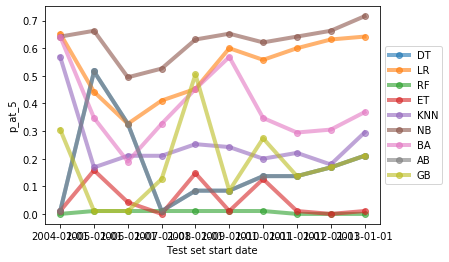

<Figure size 432x288 with 0 Axes>

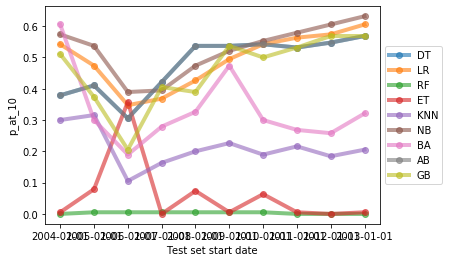

<Figure size 432x288 with 0 Axes>

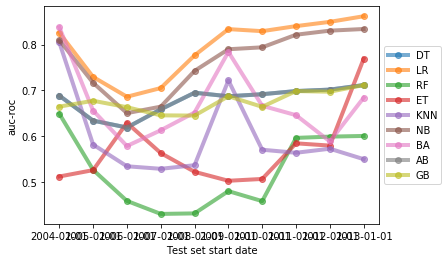

In [230]:
importlib.reload(pipeline)

for metric in metrics_to_display:
    #For each model, find the set of parameters that work the best in each train/test set
    best_models = pipeline.get_best_models_of_each_type_for_each_train_test_set(models_to_run,results,'test_set_start_date', metric)
    pipeline.plot_models_in_time(models_to_run, best_models, metric)
   